In [217]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Importar Dataset

df_exp = pd.read_csv("ExportacionesAño2023.csv", encoding="ISO-8859-1", sep=";")

In [219]:
# Asignar nuevos nombres a columnas de Dataframe

columnas = [
    'año', 'mes', 'region', 'pais_destino', 'via_transporte',
    'puerto_embarque', 'aduana', 'sector', 'clasificacion', 'producto',
    'cod_arancelario', 'monto_fob_usd', 'peso_en_toneladas', 'tipo_operacion'
]

df_exp.columns = columnas

print(df_exp.columns)

Index(['año', 'mes', 'region', 'pais_destino', 'via_transporte',
       'puerto_embarque', 'aduana', 'sector', 'clasificacion', 'producto',
       'cod_arancelario', 'monto_fob_usd', 'peso_en_toneladas',
       'tipo_operacion'],
      dtype='object')


In [220]:
# Chequear primeras 10 columnas

print(df_exp.head())

    año    mes       region    pais_destino                via_transporte  \
0  2023  Enero  Antofagasta        Alemania  Marítima, Fluvial y Lacustre   
1  2023  Enero  Antofagasta        Alemania  Marítima, Fluvial y Lacustre   
2  2023  Enero  Antofagasta  Arabia Saudita  Marítima, Fluvial y Lacustre   
3  2023  Enero  Antofagasta       Argentina           Carretero/Terrestre   
4  2023  Enero  Antofagasta       Argentina           Carretero/Terrestre   

  puerto_embarque       aduana     sector               clasificacion  \
0     Antofagasta  Antofagasta     Minero                     Minería   
1  Puerto Angamos  Antofagasta     Minero                     Minería   
2     Antofagasta  Antofagasta  No minero  Otros productos relevantes   
3            Jama  Antofagasta     Minero                     Minería   
4            Jama  Antofagasta     Minero                     Minería   

        producto  cod_arancelario monto_fob_usd peso_en_toneladas  \
0          Cobre         7403

In [221]:
# Chequear ultimas 10 columnas

print(df_exp.tail())

         año        mes      region pais_destino  \
317195  2023  Diciembre  Valparaíso      Vietnam   
317196  2023  Diciembre  Valparaíso      Vietnam   
317197  2023  Diciembre  Valparaíso      Vietnam   
317198  2023  Diciembre  Valparaíso      Vietnam   
317199  2023  Diciembre  Valparaíso      Vietnam   

                      via_transporte puerto_embarque      aduana     sector  \
317195  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317196  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317197  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317198  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   
317199  Marítima, Fluvial y Lacustre      Valparaíso  Valparaíso  No minero   

       clasificacion producto  cod_arancelario monto_fob_usd  \
317195  Vitivinícola    Vinos         22042168       1.662,1   
317196  Vitivinícola    Vinos         22042168      11.817,0   
317197  Vitivinícola

In [222]:
# Consultar tipo de datos

print(df_exp.dtypes)

año                   int64
mes                  object
region               object
pais_destino         object
via_transporte       object
puerto_embarque      object
aduana               object
sector               object
clasificacion        object
producto             object
cod_arancelario       int64
monto_fob_usd        object
peso_en_toneladas    object
tipo_operacion       object
dtype: object


In [223]:
# Cambiar tipo de datos

df_exp['cod_arancelario'] = df_exp['cod_arancelario'].astype(str)

In [224]:
# Cambiar tipo de datos

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].replace({'\.': '', ',': '.'}, regex=True)

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].astype(float)

In [225]:
# Eliminar los puntos como separadores de miles y sustituir coma por punto.

df_exp['monto_fob_usd'] = df_exp['monto_fob_usd'].replace({r'\.': '', ',': '.'}, regex=True).astype('float32')
df_exp['peso_en_toneladas'] = df_exp['peso_en_toneladas'].replace({r'\.': '', ',': '.'}, regex=True).astype('float32')


In [226]:
# Verificar Cambio

print(df_exp[['monto_fob_usd', 'peso_en_toneladas']].dtypes)

monto_fob_usd        float32
peso_en_toneladas    float32
dtype: object


In [227]:
# Estadistica descriptiva

df_exp[['monto_fob_usd', 'peso_en_toneladas']].describe()

,monto_fob_usd,peso_en_toneladas
count,3.172000e+05,316025.000000
mean,3.012052e+05,204.308853
std,4.333386e+06,5452.550781
min,-1.204397e+05,-32.599998
25%,2.112975e+03,0.100000
50%,1.490015e+04,3.900000
75%,6.759218e+04,24.799999
max,7.401261e+08,969897.000000


In [228]:
# Total de exportaciones por país

df_exp['pais_destino'].value_counts()

pais_destino
Estados Unidos de América    47567
Perú                         29538
Brasil                       17966
China                        17647
Bolivia                      12847
                             ...  
Malawi                           1
Zimbabwe                         1
Monserrat                        1
Chad                             1
Islas Marshall                   1
Name: count, Length: 201, dtype: int64

In [229]:
# Agrupar por pais de destino y sumar cantidades en dolares para cada país. 
# Ordenar en orden descendente para ver los países con la mayor cantidad exportada. Mostrar los 10 países con las exportaciones más altas.

paises_exportacion = df_exp.groupby('pais_destino')['monto_fob_usd'].sum()

paises_exportacion = paises_exportacion.sort_values(ascending=False)

print(paises_exportacion.head(10))

pais_destino
China                        3.593950e+10
Estados Unidos de América    1.542787e+10
Japón                        6.713103e+09
Corea del Sur                5.759273e+09
Brasil                       4.351734e+09
Perú                         1.941914e+09
Países Bajos                 1.804016e+09
México                       1.713802e+09
Canadá                       1.469725e+09
España                       1.463817e+09
Name: monto_fob_usd, dtype: float32


In [230]:
# Conteo de exportaciones por mes

df_exp['mes'].value_counts()

mes
Marzo         29833
Mayo          29314
Agosto        27705
Julio         27364
Abril         27355
Junio         27273
Octubre       26615
Enero         26465
Febrero       25515
Septiembre    23841
Noviembre     23805
Diciembre     22115
Name: count, dtype: int64

In [231]:
# Conteo de exportaciones por región de origen

df_exp['region'].value_counts()

region
Valparaíso                               186142
Metropolitana                             66960
Biobío                                    35154
Arica y Parinacota                        13738
Antofagasta                                4655
Otros Puntos de Control                    3069
La Araucanía                               2264
Tarapacá                                   1690
Magallanes y la Antártica Chilena          1161
Coquimbo                                   1144
Los Lagos                                   500
Atacama                                     421
Aysén del General C. Ibañez del Campo       272
Los Ríos                                     28
El Maule                                      2
Name: count, dtype: int64

In [232]:
#Agrupar los datos por puerto de embarque y mes para contar las exportaciones, luego identificar el puerto más utilizado en cada mes.

df_exp_grouped = df_exp.groupby(['mes', 'puerto_embarque']).size().reset_index(name='exportaciones')

df_top_puertos = df_exp_grouped.loc[df_exp_grouped.groupby('mes')['exportaciones'].idxmax()]

print(df_top_puertos)


            mes puerto_embarque  exportaciones
46        Abril     San Antonio           7969
99       Agosto     San Antonio           8876
154   Diciembre     San Antonio           6466
207       Enero     San Antonio           8268
260     Febrero     San Antonio           7732
311       Julio     San Antonio           8738
365       Junio     San Antonio           8302
417       Marzo     San Antonio           9321
470        Mayo     San Antonio           8935
524   Noviembre     San Antonio           7733
579     Octubre     San Antonio           8312
630  Septiembre     San Antonio           6976


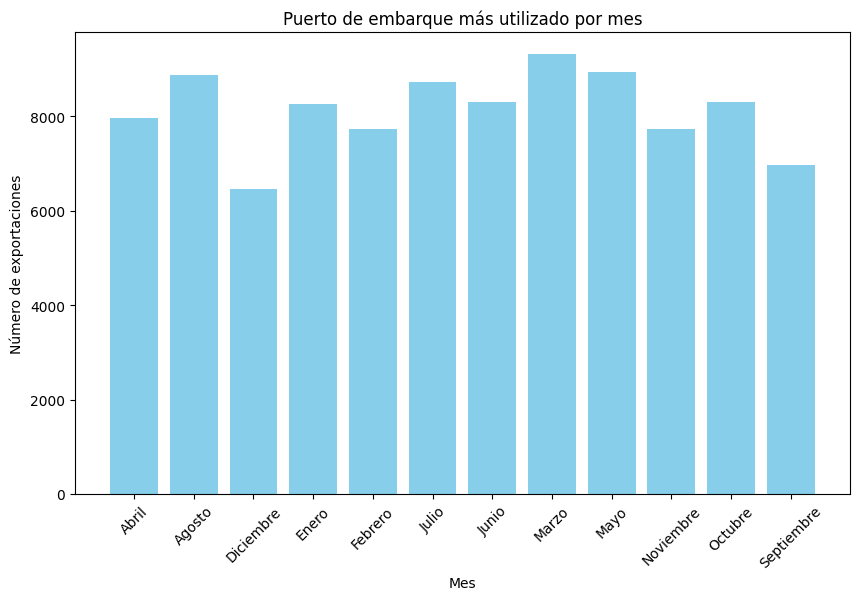

In [233]:
# Crear el gráfico de barras

plt.figure(figsize=(10, 6))
plt.bar(df_top_puertos['mes'], df_top_puertos['exportaciones'], color='skyblue')

# Etiquetas y título
plt.title("Puerto de embarque más utilizado por mes")
plt.xlabel("Mes")
plt.ylabel("Número de exportaciones")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [234]:
# Agrupar los datos por puerto y mes para contar las exportaciones, ordenar por 'MES' y luego por 'Exportaciones' en orden descendente, y seleccionar los tres puertos principales de cada mes.

df_exp_grouped = df_exp.groupby(['mes', 'puerto_embarque']).size().reset_index(name='exportaciones')

df_exp_grouped = df_exp_grouped.sort_values(['mes', 'exportaciones'], ascending=[True, False])

df_top3_puertos = df_exp_grouped.groupby('mes').head(3).reset_index(drop=True)

print(df_top3_puertos)


           mes                     puerto_embarque  exportaciones
0        Abril                         San Antonio           7969
1        Abril                          Valparaíso           5567
2        Abril            Aerop. A. Merino Benítez           5306
3       Agosto                         San Antonio           8876
4       Agosto            Aerop. A. Merino Benítez           5796
5       Agosto                          Valparaíso           4331
6    Diciembre                         San Antonio           6466
7    Diciembre            Aerop. A. Merino Benítez           5534
8    Diciembre                          Valparaíso           3147
9        Enero                         San Antonio           8268
10       Enero            Aerop. A. Merino Benítez           5552
11       Enero                          Valparaíso           4849
12     Febrero                         San Antonio           7732
13     Febrero            Aerop. A. Merino Benítez           5037
14     Feb

In [235]:
# Definir el orden de los meses en español, convertir la columna 'mes' a categórica con este orden, agrupar los datos para contar las exportaciones por puerto y mes, ordenar por 'mes' y 'exportaciones' en orden descendente, seleccionar los tres primeros puertos de cada mes
orden_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
               "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

df_exp['mes'] = pd.Categorical(df_exp['mes'], categories=orden_meses, ordered=True)

df_exp_grouped = df_exp.groupby(['mes', 'puerto_embarque'], observed=False).size().reset_index(name='exportaciones')

df_exp_grouped = df_exp_grouped.sort_values(['mes', 'exportaciones'], ascending=[True, False])

df_top3_puertos = df_exp_grouped.groupby('mes', observed=False).head(3).reset_index(drop=True)

print(df_top3_puertos)


           mes                     puerto_embarque  exportaciones
0        Enero                         San Antonio           8268
1        Enero            Aerop. A. Merino Benítez           5552
2        Enero                          Valparaíso           4849
3      Febrero                         San Antonio           7732
4      Febrero            Aerop. A. Merino Benítez           5037
5      Febrero                          Valparaíso           4949
6        Marzo                         San Antonio           9321
7        Marzo            Aerop. A. Merino Benítez           6018
8        Marzo                          Valparaíso           5733
9        Abril                         San Antonio           7969
10       Abril                          Valparaíso           5567
11       Abril            Aerop. A. Merino Benítez           5306
12        Mayo                         San Antonio           8935
13        Mayo            Aerop. A. Merino Benítez           5929
14        

C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\2466785954.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_3_puertos_por_mes = top_puertos_por_mes.sort_values('monto_fob_usd', ascending=False).groupby('mes').head(3).reset_index(drop=True)


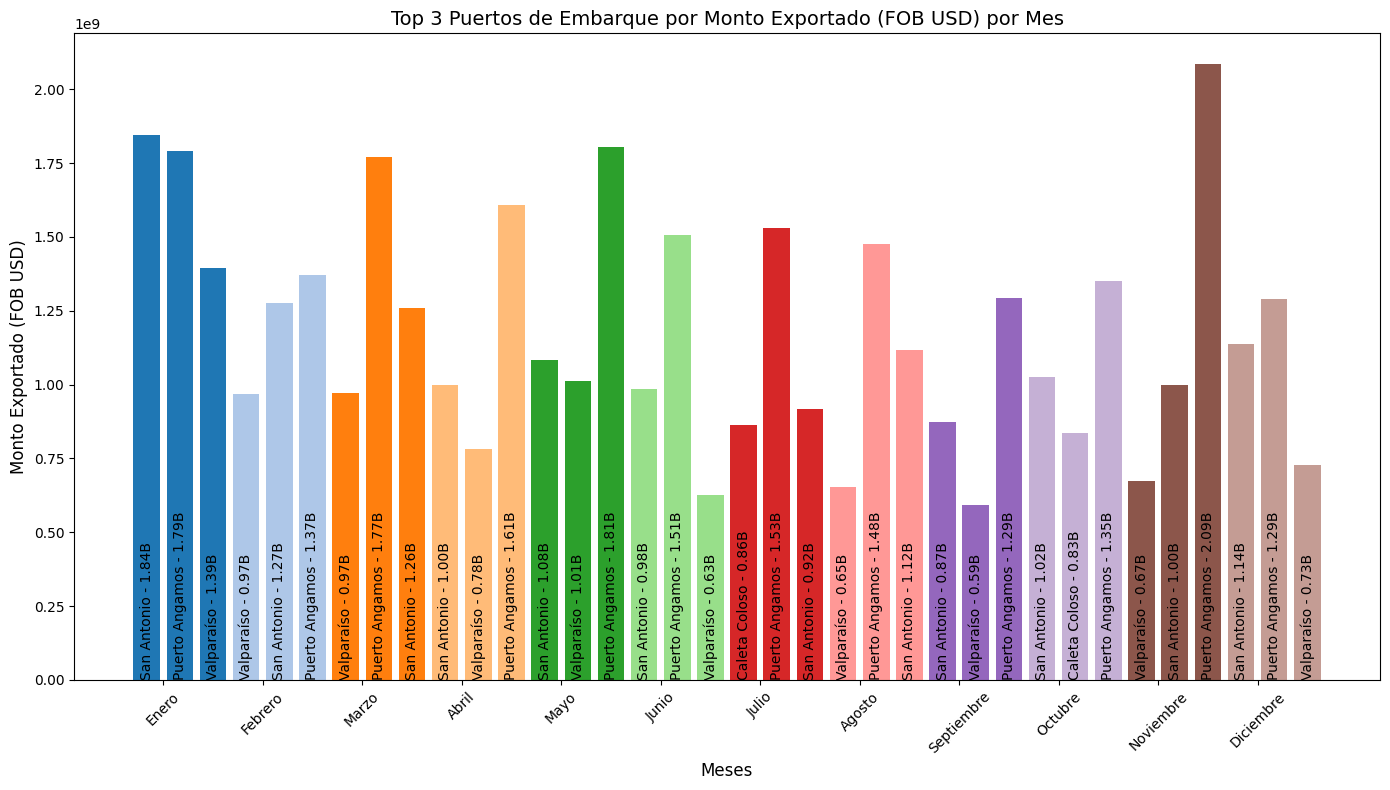

In [236]:
# Agrupar los datos por mes y puerto, y luego sumar las exportaciones por monto_fob_usd
top_puertos_por_mes = df_exp.groupby(['mes', 'puerto_embarque'], observed=False)['monto_fob_usd'].sum().reset_index()

# Obtener los 3 puertos con mayor monto de exportación por mes
top_3_puertos_por_mes = top_puertos_por_mes.sort_values('monto_fob_usd', ascending=False).groupby('mes').head(3).reset_index(drop=True)

# Convertir la columna 'mes' a categórica con el orden especificado
top_3_puertos_por_mes['mes'] = pd.Categorical(top_3_puertos_por_mes['mes'], categories=orden_meses, ordered=True)

# Ordenar los datos por mes
top_3_puertos_por_mes = top_3_puertos_por_mes.sort_values(by='mes')

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Colores personalizados para las barras
colors = plt.cm.tab20.colors

# Configurar las posiciones en el eje X para cada barra (se separan por meses)
x_offset = 0
for idx, mes in enumerate(top_3_puertos_por_mes['mes'].unique()):
    data_mes = top_3_puertos_por_mes[top_3_puertos_por_mes['mes'] == mes]
    
    # Generar las posiciones para las barras
    x_positions = [i + x_offset for i in range(len(data_mes))]
    
    # Graficar las barras
    plt.bar(x_positions, data_mes['monto_fob_usd'], color=colors[idx % len(colors)], label=f'{mes}')
    
    # Añadir las etiquetas de los puertos y los montos dentro de las barras de forma vertical
    for x, monto, puerto in zip(x_positions, data_mes['monto_fob_usd'], data_mes['puerto_embarque']):
        # Abreviar el monto en miles de millones
        monto_abreviado = f'{monto / 1e9:.2f}B'  # Abreviación en billones
        plt.text(x, 0,  f'{puerto} - {monto_abreviado}', ha='center', va='bottom', fontsize=10, color='black', rotation=90)

    # Aumentar el desplazamiento para las barras del siguiente mes
    x_offset += len(data_mes)  # Desplazamiento para no superponer barras

plt.title("Top 3 Puertos de Embarque por Monto Exportado (FOB USD) por Mes", fontsize=14)
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Monto Exportado (FOB USD)", fontsize=12)

# Ordenar los meses según la lista 'orden_meses'
month_labels = sorted(top_3_puertos_por_mes['mes'].unique(), key=lambda mes: orden_meses.index(mes))

# Configurar las posiciones de las etiquetas en el eje X
x_tick_positions = [i + 0.5 for i in range(0, x_offset, 3)]  # Posiciones de los meses
plt.xticks(x_tick_positions, month_labels, rotation=45)

plt.tight_layout()

plt.show()

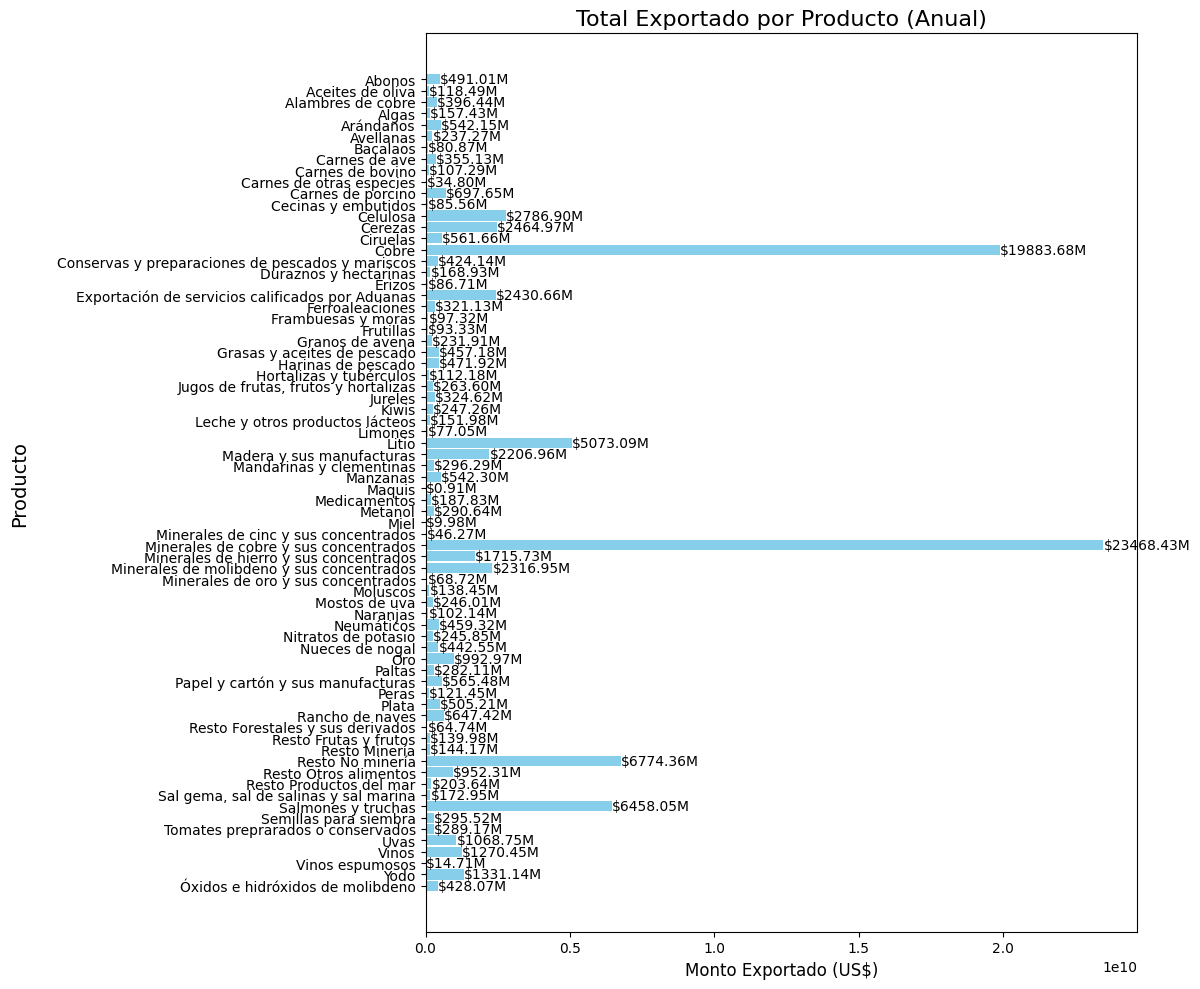

In [237]:
# Grafico de total exportado por producto en USD
df_exp_annual = df_exp.groupby(['producto'])['monto_fob_usd'].sum().reset_index(name='exportaciones_anuales')

df_exp_annual = df_exp_annual.sort_values(by='producto', ascending=False)

plt.figure(figsize=(12, 10))

plt.barh(df_exp_annual['producto'], df_exp_annual['exportaciones_anuales'], color='skyblue', height=0.9)

for index, value in enumerate(df_exp_annual['exportaciones_anuales']):
    plt.text(value + 5000000, index, f"${value/1e6:.2f}M", va='center', fontsize=10)

plt.title('Total Exportado por Producto (Anual)', fontsize=16)
plt.xlabel('Monto Exportado (US$)', fontsize=12)
plt.ylabel('Producto', fontsize=14, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

                           via_transporte  cantidad_exportaciones
0                                   Aéreo                   37727
1                     Carretero/Terrestre                   52206
2                           Courier/Aéreo                   28612
3            Marítima, Fluvial y Lacustre                  193773
4                  Oleoductos, Gasoductos                       3
5                                    Otra                    4860
6                                  Postal                       3
7  Tendido Eléctrico (Aéreo, Subterráneo)                      16


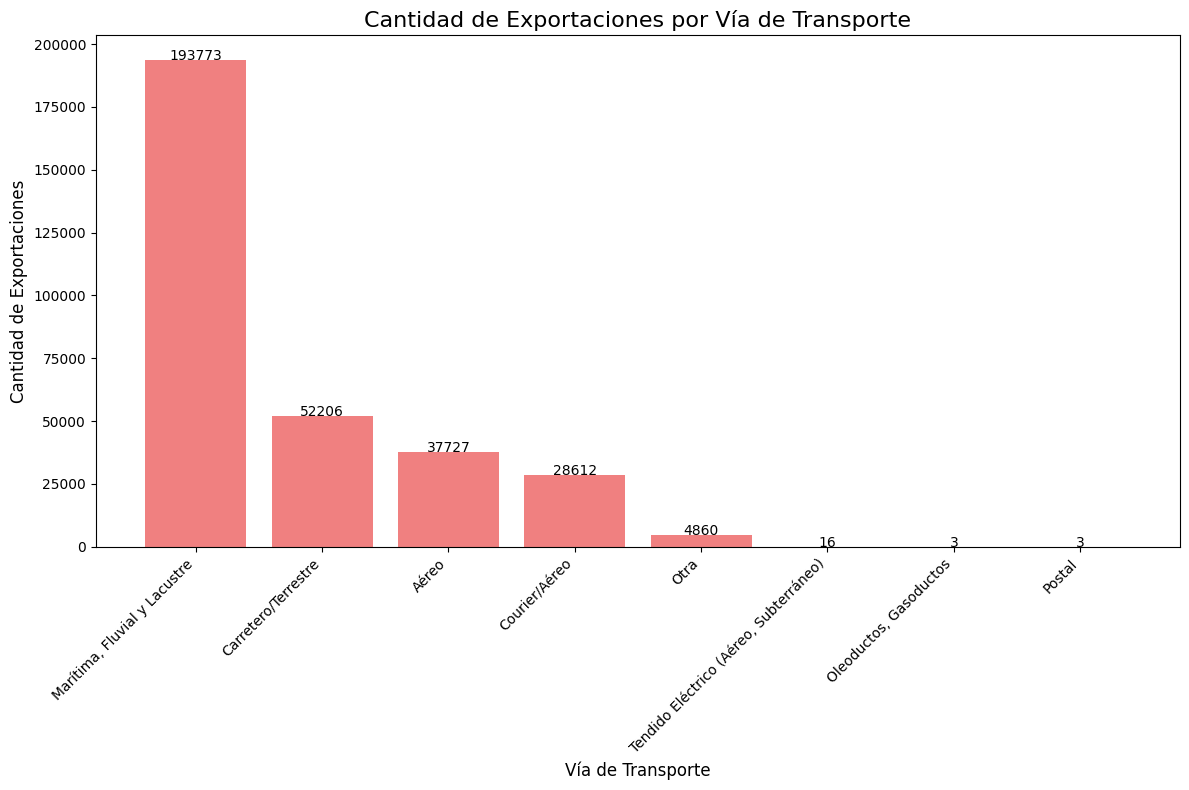

In [238]:
#Cantidad de exportaciones según via de transporte

df_via_transporte = df_exp.groupby('via_transporte').size().reset_index(name='cantidad_exportaciones')

print(df_via_transporte)

df_via_transporte = df_via_transporte.sort_values(by='cantidad_exportaciones', ascending=False)

# Grafico de Exportaciones según via de transporte

plt.figure(figsize=(12, 8))

plt.bar(df_via_transporte['via_transporte'], df_via_transporte['cantidad_exportaciones'], color='lightcoral')

for index, value in enumerate(df_via_transporte['cantidad_exportaciones']):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

plt.title('Cantidad de Exportaciones por Vía de Transporte', fontsize=16)
plt.xlabel('Vía de Transporte', fontsize=12)
plt.ylabel('Cantidad de Exportaciones', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()

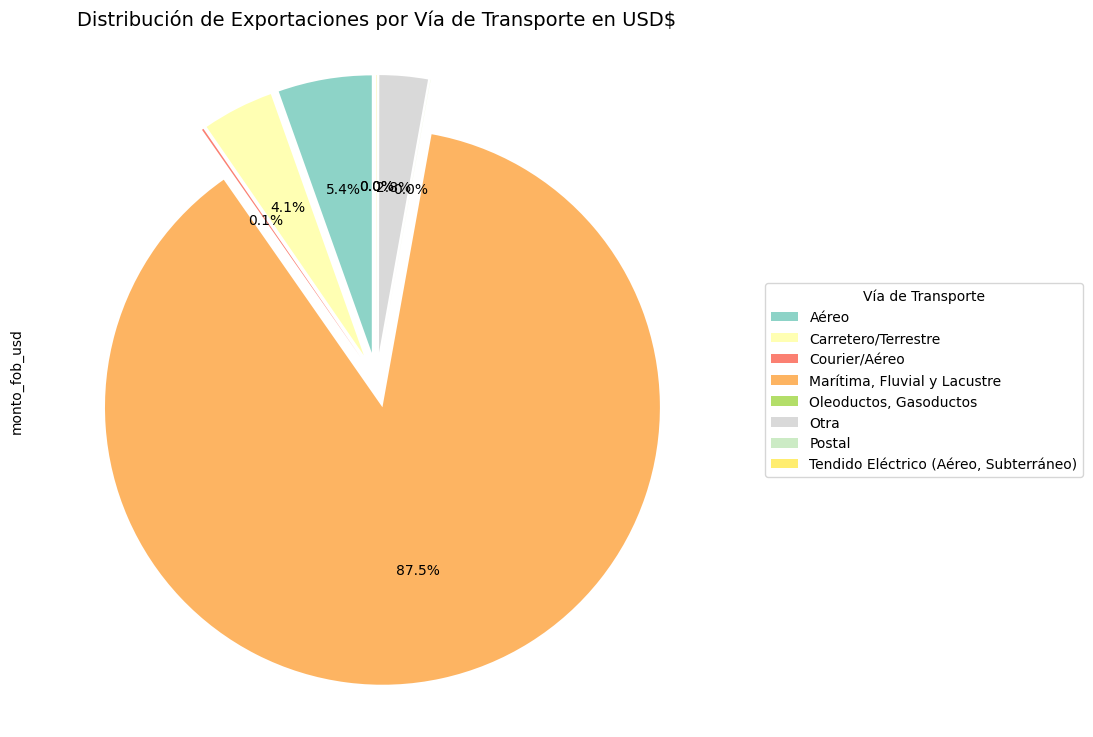

In [239]:
# Agrupar los datos por vía de transporte y sumar los valores de 'monto_usd'
exportaciones_por_via = df_exp.groupby('via_transporte')['monto_fob_usd'].sum()

# Crear el gráfico de torta sin nombres en la torta
plt.figure(figsize=(10, 8))

# Graficar el gráfico de torta, sin etiquetas internas, pero con la leyenda
ax = exportaciones_por_via.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', labels=None, explode=[0.1]*len(exportaciones_por_via))

# Personalizar el gráfico
plt.title('Distribución de Exportaciones por Vía de Transporte en USD$', fontsize=14)

# Añadir leyenda al lado del gráfico
plt.legend(title='Vía de Transporte', labels=exportaciones_por_via.index, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajustar el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [240]:
# Productos Exportados por vía aérea (Cantidad de Exportaciones)
df_aereo = df_exp[df_exp['via_transporte'] == 'Aéreo']

df_productos_aereo = df_aereo.groupby('producto').size().reset_index(name='cantidad_exportaciones')

df_productos_aereo = df_productos_aereo.sort_values(by='cantidad_exportaciones', ascending=False)

print(df_productos_aereo)

                                            producto  cantidad_exportaciones
54                                  Resto No minería                   22715
57                                Salmones y truchas                    3845
34                                      Medicamentos                    2023
58                             Semillas para siembra                    1770
12                                           Cerezas                    1571
..                                               ...                     ...
38         Minerales de molibdeno y sus concentrados                       1
43                               Nitratos de potasio                       1
18  Exportación de servicios calificados por Aduanas                       1
4                                          Avellanas                       1
63                                              Yodo                       1

[64 rows x 2 columns]


In [241]:
# # Productos Exportados por Vía terrestre (Cantidad de Exportaciones)
df_carretero = df_exp[df_exp['via_transporte'].str.contains('carretero', case=False, na=False)]

df_productos_carretero = df_carretero.groupby('producto').size().reset_index(name='cantidad_exportaciones')

df_productos_carretero = df_productos_carretero.sort_values(by='cantidad_exportaciones', ascending=False)

print(df_productos_carretero)

                                            producto  cantidad_exportaciones
48                                  Resto No minería                   30257
56                                             Vinos                    5825
49                             Resto Otros alimentos                    2959
31                                          Manzanas                    1986
52                                Salmones y truchas                    1673
32                                      Medicamentos                    1484
45                  Resto Forestales y sus derivados                     579
55                                              Uvas                     577
42                 Papel y cartón y sus manufacturas                     513
26                                             Kiwis                     501
29                         Madera y sus manufacturas                     434
12                                          Ciruelas                     376

In [242]:
# Obtener los nombres únicos de los puertos de embarque
puertos_unicos = df_exp['puerto_embarque'].unique()

print(puertos_unicos)


['Antofagasta' 'Puerto Angamos' 'Jama' 'Ollagüe' 'San Pedro de Atacama'
 'Caleta Coloso' 'Terminal Muelle Mecanizado Esperanza' 'Tocopilla'
 'Mejillones' 'Terminal Graneles del Norte' 'Arica' 'Chungará'
 'Concordia (Chacalluta)' 'Paso Guanaco Sonso' 'Huasco / Guacolda'
 'Caldera' 'Chañaral / Barquito' 'Huemules' 'Coronel' 'San Vicente'
 'Lirquén' 'Aerop. Carriel Sur' 'Talcahuano' 'Muelle Huachipato'
 'Cap. Huachipato' 'Los Vilos' 'Coquimbo' 'Guayacán' 'Pehuenche'
 'Pino Hachado (Liucura)' 'Aeródromo La Araucanía' 'Cardenal Samoré'
 'Calbuco' 'Puerto Montt' 'Corral' 'Aerop. C. Ibañez del Campo'
 'Integración Austral (Monte Aymond)' 'Natales' 'Punta Arenas'
 'Cabo Negro' 'Puerto Williams' 'Aerop. A. Merino Benítez'
 'Otros Puntos de Control' 'Iquique' 'Colchane' 'Patillos' 'Patache'
 'Aerop. Diego Aracena' 'Cristo Redentor (Los Libertadores)' 'San Antonio'
 'Valparaíso' 'Ventanas' 'Quintero' 'Aerop. Chacalluta' 'Coyhaique Alto'
 'Aerop. El Tepual' 'Chacabuco / Puerto Aysén' 'San Sebastiá

In [243]:
#Exportaciones por Producto desde los Puertos de Coquimbo y Guayacán: Cantidad y Monto FOB Total

df_puertos_filtrados = df_exp[df_exp['puerto_embarque'].isin(['Coquimbo', 'Guayacán'])]

df_productos_por_puerto = df_puertos_filtrados.groupby(['puerto_embarque', 'producto']).agg(
    Cantidad_Exportaciones=('producto', 'size'),
    Monto_FOB_Total=('monto_fob_usd', 'sum')
).reset_index()

df_productos_por_puerto_ordenado = df_productos_por_puerto.sort_values(by='Monto_FOB_Total', ascending=False)

print(df_productos_por_puerto_ordenado)

   puerto_embarque                                producto  \
5         Coquimbo   Minerales de cobre y sus concentrados   
11        Guayacán  Minerales de hierro y sus concentrados   
10        Coquimbo                                    Uvas   
1         Coquimbo                                 Cerezas   
3         Coquimbo                   Duraznos y nectarinas   
0         Coquimbo                               Arándanos   
2         Coquimbo                                Ciruelas   
9         Coquimbo                        Resto No minería   
8         Coquimbo                   Resto Frutas y frutos   
7         Coquimbo                         Rancho de naves   
6         Coquimbo                                   Peras   
4         Coquimbo               Madera y sus manufacturas   
12        Guayacán                         Rancho de naves   

    Cantidad_Exportaciones  Monto_FOB_Total  
5                       39     8.696531e+08  
11                      15     2.038368

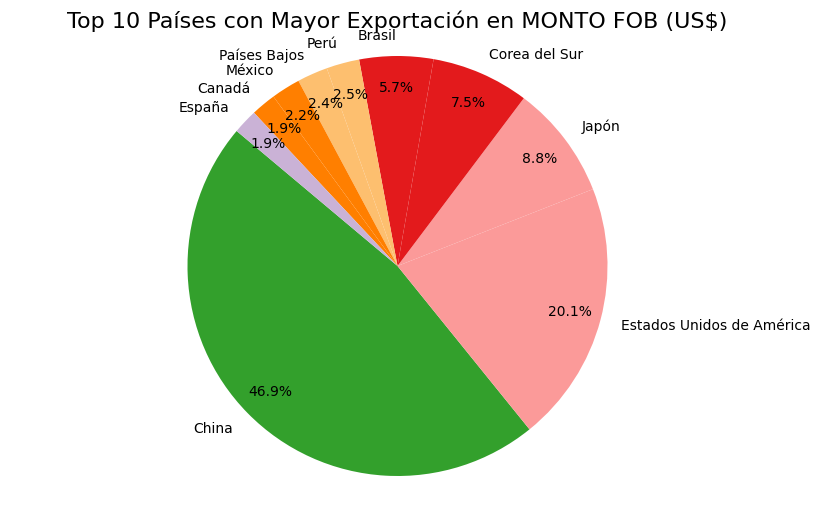

In [244]:
#Top 10 Países Destino con Mayor Exportación en Monto FOB (US$)

df_paises_exportacion = df_exp.groupby('pais_destino')['monto_fob_usd'].sum().reset_index()

df_top_paises = df_paises_exportacion.sort_values(by='monto_fob_usd', ascending=False).head(10)

colors = plt.cm.Paired(np.linspace(0.3, 0.7, 10))

plt.figure(figsize=(10, 6))
plt.pie(df_top_paises['monto_fob_usd'],
        labels=df_top_paises['pais_destino'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.85)  # Aumenta este valor para alejar más los porcentajes

plt.title('Top 10 Países con Mayor Exportación en MONTO FOB (US$)', fontsize=16)

plt.axis('equal')
plt.show()

In [245]:
#Top 10 Países Destino con Mayor Importación por Puerto de Embarque

df_importaciones_por_puerto_pais = df_exp.groupby(['puerto_embarque', 'pais_destino'])['monto_fob_usd'].sum().reset_index()

df_importaciones_por_puerto_pais = df_importaciones_por_puerto_pais.sort_values(by=['puerto_embarque', 'monto_fob_usd'], ascending=[True, False])

top_10_paises_por_puerto = df_importaciones_por_puerto_pais.groupby('puerto_embarque').head(10)

print(top_10_paises_por_puerto)

               puerto_embarque               pais_destino  monto_fob_usd
51    Aerop. A. Merino Benítez  Estados Unidos de América   3.153108e+09
151   Aerop. A. Merino Benítez                      Suiza   7.002831e+08
121   Aerop. A. Merino Benítez                      Otros   4.848904e+08
32    Aerop. A. Merino Benítez                     Canadá   4.105520e+08
34    Aerop. A. Merino Benítez                      China   3.825806e+08
...                        ...                        ...            ...
1394                  Ventanas                     España   6.322559e+07
1396                  Ventanas                      Japón   3.551704e+07
1391                  Ventanas                   Alemania   1.171340e+07
1398                  Ventanas       República Dominicana   9.897687e+06
1397                  Ventanas                      Otros   5.854224e+05

[359 rows x 3 columns]


In [246]:
#Top 50 Exportaciones por Producto, Puerto de Embarque y País Destino

df_exportaciones_por_producto_puerto_pais = df_exp.groupby(['producto', 'puerto_embarque', 'pais_destino'])['monto_fob_usd'].sum().reset_index()

df_exportaciones_por_producto_puerto_pais_sorted = df_exportaciones_por_producto_puerto_pais.sort_values(by='monto_fob_usd', ascending=False)

top_50_exportaciones_puerto_pais = df_exportaciones_por_producto_puerto_pais_sorted.head(50)

print(top_50_exportaciones_puerto_pais)

                                              producto  \
3802             Minerales de cobre y sus concentrados   
1242                                             Cobre   
1244                                             Cobre   
3823             Minerales de cobre y sus concentrados   
3085                                             Litio   
3854             Minerales de cobre y sus concentrados   
3828             Minerales de cobre y sus concentrados   
6591                                Salmones y truchas   
3086                                             Litio   
3819             Minerales de cobre y sus concentrados   
1263                                             Cobre   
3847             Minerales de cobre y sus concentrados   
3798             Minerales de cobre y sus concentrados   
771                                           Celulosa   
927                                            Cerezas   
963                                            Cerezas   
1292          

In [247]:
# Suma y promedio por código arancelario
totales_por_codigo = df_exp.groupby('cod_arancelario')['monto_fob_usd'].sum()
promedios_por_codigo = df_exp.groupby('cod_arancelario')['monto_fob_usd'].mean()

print(totales_por_codigo)
print(promedios_por_codigo)

cod_arancelario
10011100    6.400100e+04
10011900    7.690000e+01
10019919    7.472000e+02
10029000    1.000000e+01
10031000    4.361980e+04
                ...     
97069030    4.000000e+02
97069050    2.400000e+02
97069090    3.200000e+03
98900       2.210300e+03
99999999    8.449733e+07
Name: monto_fob_usd, Length: 5236, dtype: float32
cod_arancelario
10011100     64001.000000
10011900        76.900002
10019919       249.066666
10029000        10.000000
10031000     21809.900391
                ...      
97069030       400.000000
97069050       240.000000
97069090      1066.666626
98900         1105.150024
99999999    188610.109375
Name: monto_fob_usd, Length: 5236, dtype: float32


In [248]:
#Número de Exportaciones por Código Arancelario

exportaciones_por_codigo = df_exp['cod_arancelario'].value_counts()

print(exportaciones_por_codigo)

cod_arancelario
22042168    7181
22042161    6511
22042141    5039
22042142    4920
259900      4724
            ... 
29391900       1
85434000       1
12072100       1
15012000       1
91031000       1
Name: count, Length: 5236, dtype: int64


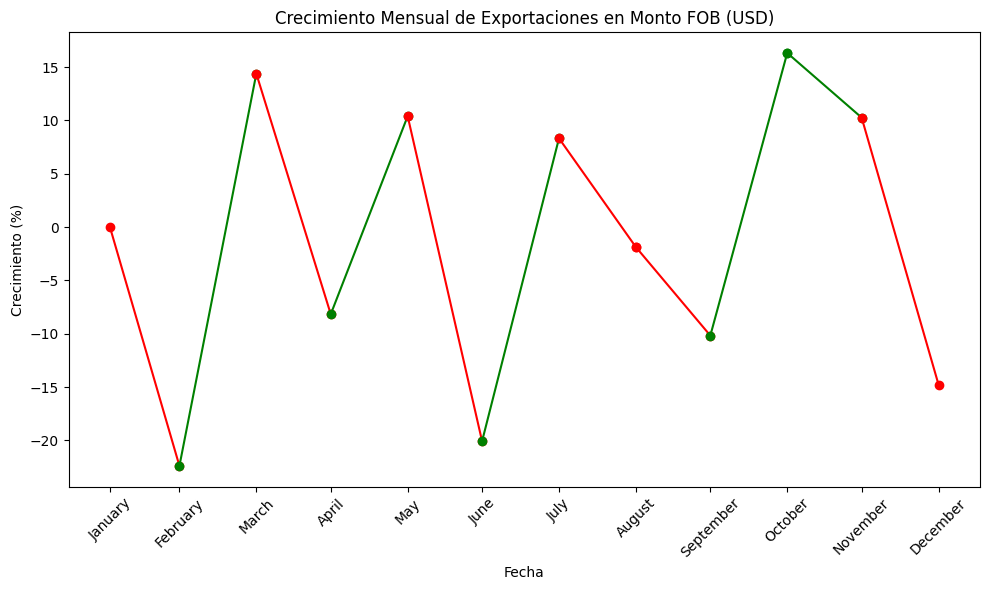

In [249]:
#Crecimiento Mensual de las Exportaciones en Monto FOB (USD)

# Diccionario para mapear nombres de meses en español a números
meses_dict = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Mapear el mes al número correspondiente
df_exp['mes_numero'] = df_exp['mes'].str.strip().str.lower().map(meses_dict)

# Renombrar temporalmente las columnas para crear la fecha
df_exp = df_exp.rename(columns={'año': 'year', 'mes_numero': 'month'})
df_exp['fecha'] = pd.to_datetime(df_exp[['year', 'month']].assign(day=1), errors='coerce')
df_exp = df_exp.dropna(subset=['fecha'])  # eliminar filas con fechas no válidas

# Restaurar los nombres originales de las columnas
df_exp = df_exp.rename(columns={'year': 'año', 'month': 'mes_numero'})

# Establecer 'fecha' como índice
df_exp.set_index('fecha', inplace=True)

# Calcular el crecimiento mensual en 'monto_fob_usd'
crecimiento_mensual = df_exp['monto_fob_usd'].resample('ME').sum().pct_change() * 100

# Rellenar los valores NaN del primer mes con 0, para que el gráfico inicie en febrero
crecimiento_mensual = crecimiento_mensual.fillna(0)

# Graficar el crecimiento mensual con colores dependiendo del valor
plt.figure(figsize=(10, 6))

# Recorrer los datos y graficar con colores diferentes
for i in range(1, len(crecimiento_mensual)):
    color = 'green' if crecimiento_mensual.iloc[i] >= 0 else 'red'
    plt.plot(crecimiento_mensual.index[i-1:i+1],
             crecimiento_mensual.iloc[i-1:i+1],
             marker='o', color=color)

# Configurar etiquetas y títulos
plt.title('Crecimiento Mensual de Exportaciones en Monto FOB (USD)')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento (%)')

# Personalizar el eje X para mostrar los nombres de los meses
# Obtener los nombres de los meses para el gráfico
meses = [i.strftime('%B') for i in crecimiento_mensual.index]
plt.xticks(ticks=crecimiento_mensual.index, labels=meses, rotation=45)

# Ajustar la disposición del gráfico
plt.tight_layout()
plt.show()



region
Antofagasta                              3.386877e+10
Valparaíso                               2.715384e+10
Biobío                                   1.143034e+10
Metropolitana                            6.266134e+09
Tarapacá                                 4.984391e+09
Atacama                                  4.169468e+09
Coquimbo                                 3.576084e+09
Otros Puntos de Control                  1.352798e+09
Magallanes y la Antártica Chilena        8.911496e+08
Arica y Parinacota                       8.228440e+08
La Araucanía                             6.528747e+08
Aysén del General C. Ibañez del Campo    1.779974e+08
Los Lagos                                1.405493e+08
Los Ríos                                 5.463263e+07
El Maule                                 4.206688e+05
Name: monto_fob_usd, dtype: float32


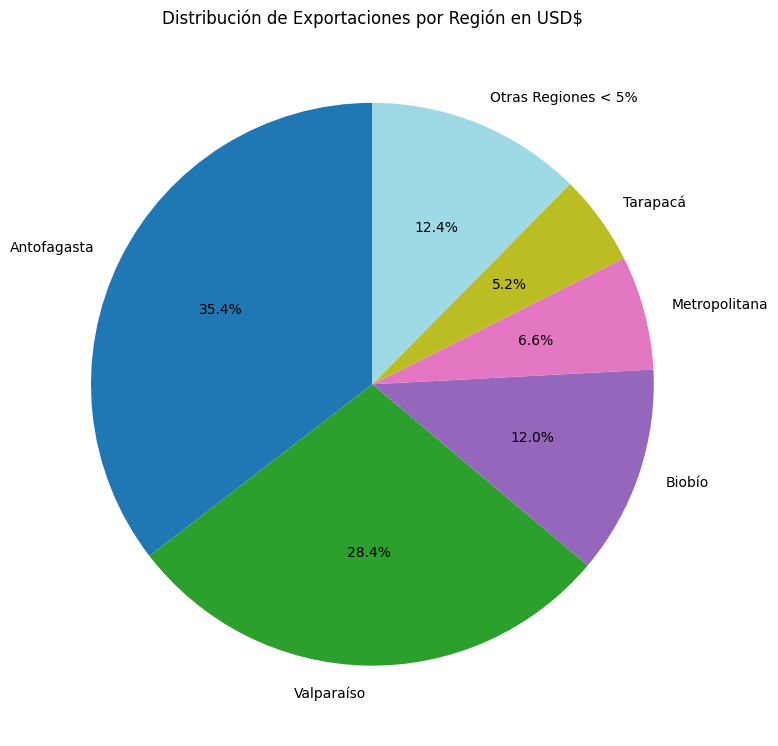

In [250]:
# Distribución de Exportaciones por Región (USD$)

exportaciones_por_region = df_exp.groupby('region')['monto_fob_usd'].sum()

exportaciones_por_region = exportaciones_por_region.sort_values(ascending=False)

print(exportaciones_por_region)

porcentajes = exportaciones_por_region / exportaciones_por_region.sum() * 100

menor_a_5porc = porcentajes < 5

otras_regiones = exportaciones_por_region[menor_a_5porc].sum()

exportaciones_por_region_filtrada = exportaciones_por_region[~menor_a_5porc]

exportaciones_por_region_filtrada['Otras Regiones < 5%'] = otras_regiones

plt.figure(figsize=(8, 8))
ax = exportaciones_por_region_filtrada.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')

plt.title('Distribución de Exportaciones por Región en USD$')
plt.ylabel('')  # Eliminar la etiqueta en el eje Y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [267]:
productos_principales = df_exp.groupby(['producto', 'cod_arancelario'])['monto_fob_usd'].sum().nlargest(10)

print(productos_principales)

producto                                          cod_arancelario
Minerales de cobre y sus concentrados             26030000           2.346843e+10
Cobre                                             74031100           1.737567e+10
Litio                                             28369130           2.485866e+09
Cerezas                                           8092919            2.412952e+09
Exportación de servicios calificados por Aduanas  259900             2.412297e+09
Salmones y truchas                                3044120            1.777501e+09
Minerales de molibdeno y sus concentrados         26131010           1.704552e+09
Litio                                             28369190           1.619672e+09
Minerales de hierro y sus concentrados            26011110           1.453688e+09
Yodo                                              28012000           1.331139e+09
Name: monto_fob_usd, dtype: float32


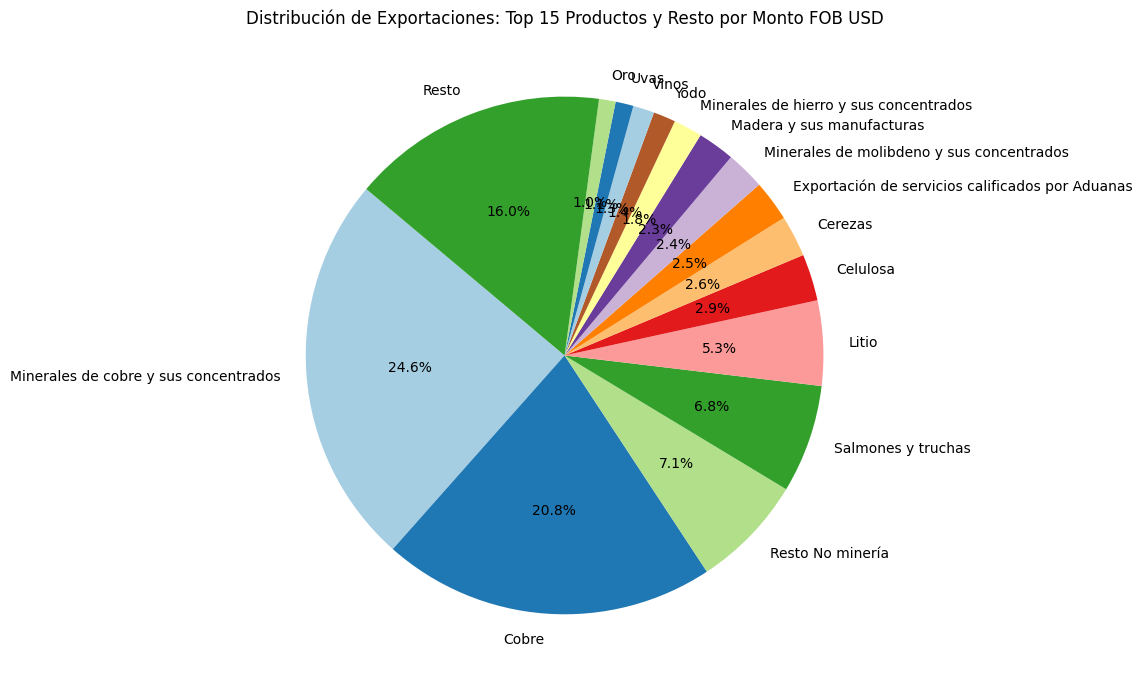

In [268]:
# Ordenar los productos por monto FOB USD en orden descendente
df_exp_productos = df_exp.groupby('producto')['monto_fob_usd'].sum().sort_values(ascending=False)

# Seleccionar el top 15 productos y calcular el monto del resto
top_10_productos = df_exp_productos[:15]
resto = pd.Series(df_exp_productos[15:].sum(), index=['Resto'])

# Combinar el top 15 con el resto
top_10_con_resto = pd.concat([top_10_productos, resto])

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_10_con_resto, labels=top_10_con_resto.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Ajustes del gráfico
plt.title("Distribución de Exportaciones: Top 15 Productos y Resto por Monto FOB USD")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

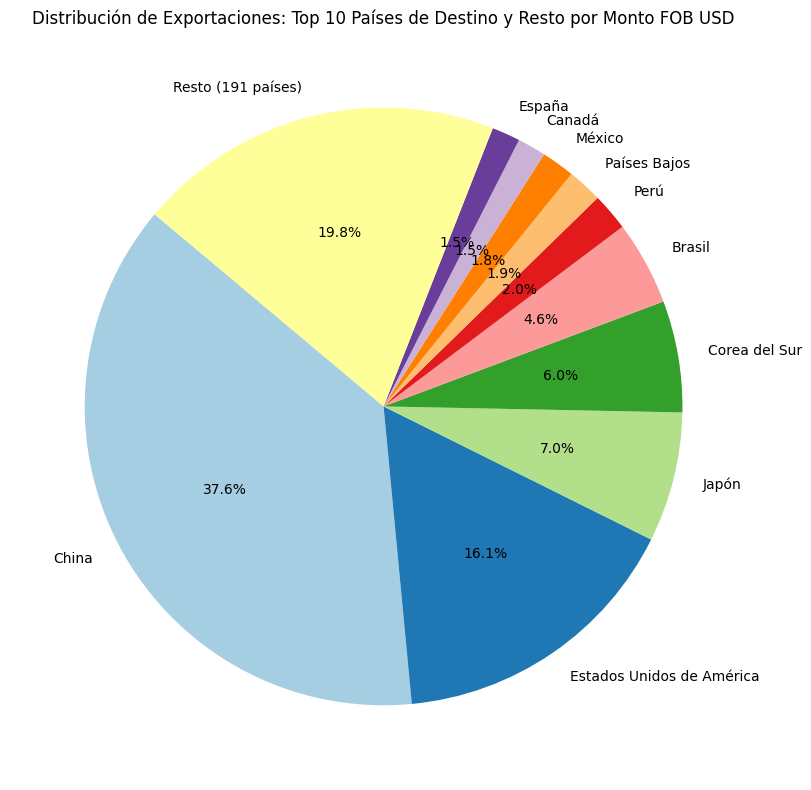

In [269]:
# Ordenar los países de destino por monto FOB USD en orden descendente
df_exp_paises = df_exp.groupby('pais_destino')['monto_fob_usd'].sum().sort_values(ascending=False)

# Seleccionar el top 10 países y calcular el monto del resto
top_10_paises = df_exp_paises[:10]
resto_monto = df_exp_paises[10:].sum()
resto_paises = len(df_exp_paises[10:])  # Número de países en "Resto"

# Crear una serie que combine el top 10 con el resto (con etiqueta personalizada)
top_10_con_resto = pd.concat([top_10_paises, pd.Series(resto_monto, index=[f"Resto ({resto_paises} países)"])])

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_10_con_resto, labels=top_10_con_resto.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Ajustes del gráfico
plt.title("Distribución de Exportaciones: Top 10 Países de Destino y Resto por Monto FOB USD")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [278]:
# Asegúrate de que estos valores estén definidos
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Limpiar y convertir la columna 'mes' a minúsculas y eliminar espacios
df_exp['mes'] = df_exp['mes'].str.strip().str.lower()

# Revisar los valores únicos de la columna 'mes'
print("Valores únicos de la columna 'mes':", df_exp['mes'].unique())

# Intentar mapear los meses a números
df_exp['mes_numero'] = df_exp['mes'].apply(lambda x: orden_meses.index(x) + 1 if x in orden_meses else None)

# Comprobar si hay valores nulos después del mapeo
if df_exp['mes_numero'].isnull().any():
    print("Algunos meses no se pudieron mapear. Verifica los valores de la columna 'mes'.")
else:
    print("Meses mapeados correctamente.")

# Crear una nueva columna 'fecha' para facilitar el análisis mensual
# Asegurarse de que 'año' y 'mes_numero' sean enteros para poder combinar correctamente
df_exp['fecha'] = pd.to_datetime(df_exp[['año', 'mes_numero']].astype(str).agg('-'.join, axis=1), format='%Y-%m')

# Establecer la columna 'fecha' como índice
df_exp.set_index('fecha', inplace=True)

# Agrupar los datos por 'sector' y obtener el total de 'monto_fob_usd' por mes
df_monto_por_mes = df_exp.groupby([df_exp.index.month, 'sector'])['monto_fob_usd'].sum().unstack()

# Ordenar los meses de acuerdo con el nombre de los meses
df_monto_por_mes.columns = df_monto_por_mes.columns.map(lambda x: orden_meses[x-1])

# Calcular el porcentaje de crecimiento por mes para cada sector
df_crecimiento_por_mes = df_monto_por_mes.pct_change(axis='columns') * 100

# Graficar el porcentaje de crecimiento por mes para cada sector
plt.figure(figsize=(12, 8))
df_crecimiento_por_mes.plot(kind='line', marker='o', figsize=(12, 8))

# Ajustar el gráfico
plt.title('Crecimiento mensual del monto FOB USD por sector', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje de Crecimiento (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Valores únicos de la columna 'mes': ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']
Meses mapeados correctamente.


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [260]:
#Promedio Ponderado de Monto FOB USD por País

total_fob = df_exp['monto_fob_usd'].sum()
df_exp['peso_mercado'] = df_exp['monto_fob_usd'] / total_fob
promedio_ponderado = df_exp.groupby('pais_destino').apply(lambda x: (x['monto_fob_usd'] * x['peso_mercado']).sum())

C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\3262854012.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promedio_ponderado = df_exp.groupby('pais_destino').apply(lambda x: (x['monto_fob_usd'] * x['peso_mercado']).sum())


In [261]:
#Análisis de Variabilidad Mensual por Producto
variabilidad_mensual = df_exp.groupby(['producto', 'mes'])['monto_fob_usd'].std()

C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\3832128182.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variabilidad_mensual = df_exp.groupby(['producto', 'mes'])['monto_fob_usd'].std()


In [262]:
#Índice de Concentración de Exportaciones (HHI) por Sector

hhi_sector = df_exp.groupby(['sector', 'pais_destino'])['monto_fob_usd'].apply(lambda x: (x / x.sum())**2).sum()

In [263]:
#Análisis de Desempeño por Vía de Transporte

transporte_desempeño = df_exp.groupby('via_transporte').agg({
    'monto_fob_usd': 'sum',
    'peso_en_toneladas': 'sum'
})
transporte_desempeño['eficiencia'] = transporte_desempeño['monto_fob_usd'] / transporte_desempeño['peso_en_toneladas']

In [264]:
#Crecimiento Acumulado Anual (CAGR) por Sector

inicio = df_exp.groupby('sector').apply(lambda x: x[x['año'] == x['año'].min()]['monto_fob_usd'].sum())
fin = df_exp.groupby('sector').apply(lambda x: x[x['año'] == x['año'].max()]['monto_fob_usd'].sum())
años = df_exp['año'].nunique()
cagr = ((fin / inicio) ** (1 / años)) - 1

C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\4020080715.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inicio = df_exp.groupby('sector').apply(lambda x: x[x['año'] == x['año'].min()]['monto_fob_usd'].sum())
C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\4020080715.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fin = df_exp.groupby('sector').apply(lambda x: x[x['año'] == x['año'].max()]['

In [265]:
#Análisis de Impacto de Aduanas en el Monto FOB

impacto_aduanas = df_exp.groupby('aduana')['monto_fob_usd'].sum().sort_values(ascending=False)

In [266]:
#Análisis de Correlación entre Peso y Monto FOB USD por Producto

correlacion_peso_precio = df_exp.groupby('producto').apply(lambda x: x['monto_fob_usd'].corr(x['peso_en_toneladas']))

C:\Users\eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\eduardo\AppData\Local\Temp\ipykernel_8748\4215106235.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlacion_peso_precio = df_exp.groupby('producto').apply(lambda x: x['monto_fob